In [1]:
#importing library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#importing order_product_merged.pki from task 4.8
ords_prods_merge = pd.read_pickle(r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis/02 Data/Prepared Data/4.8 orders_products_merged.pkl')

In [25]:
path = r'/Users/rayruslijunior/11-2021 Instacart Basket Analysis'

__Bar Charts__

<AxesSubplot:>

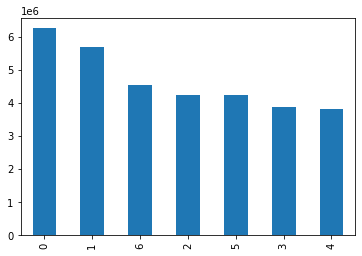

In [8]:
#adding bar charts
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

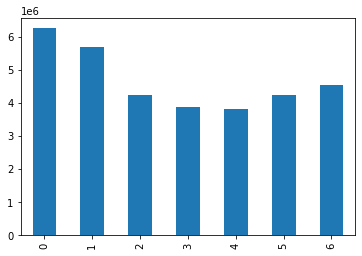

In [9]:
#sorting the bar chart
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [10]:
ords_prods_merge['order_dow'].value_counts(dropna= False)

0    6252941
1    5696724
6    4530304
2    4243173
5    4236989
3    3868747
4    3812390
Name: order_dow, dtype: int64

In [11]:
ords_prods_merge['order_dow'].value_counts(dropna= False).sort_index()

0    6252941
1    5696724
2    4243173
3    3868747
4    3812390
5    4236989
6    4530304
Name: order_dow, dtype: int64

<AxesSubplot:>

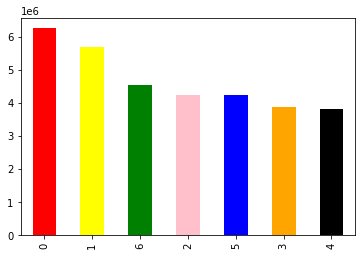

In [13]:
ords_prods_merge['order_dow'].value_counts().plot.bar(color=['red','yellow','green','pink','blue','orange','black'])

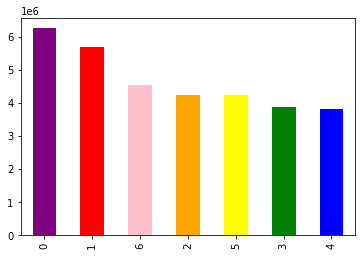

In [14]:
bar = ords_prods_merge['order_dow'].value_counts().C(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [27]:
#saving this in our visualization 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

__Histograms__

<AxesSubplot:ylabel='Frequency'>

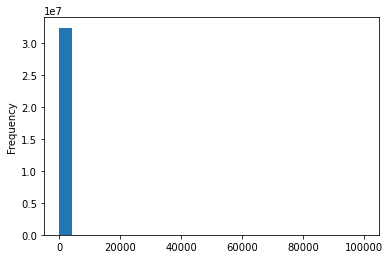

In [28]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [29]:
#something is not correct on our histogram, lets check this collumn
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

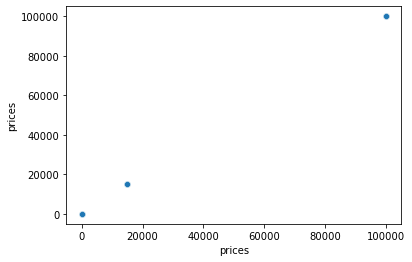

In [30]:
#yes some price are very very weird
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [32]:
#let's locate the outliers price
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag
1592,912404,17,12,2,14,5.0,False,21553.0,5.0,0.0,...,High-range product,Regularly busy,Regularly busy days,Most orders,41,Loyal customer,108.648299,High Spender,5.0,Frequent customer
1654,603376,17,22,6,16,4.0,False,21553.0,3.0,1.0,...,High-range product,Regularly busy,Regularly busy days,Most orders,41,Loyal customer,108.648299,High Spender,5.0,Frequent customer
16668,3264360,135,2,2,21,13.0,False,21553.0,6.0,0.0,...,High-range product,Regularly busy,Regularly busy days,Average orders,5,New customer,1154.792308,High Spender,12.0,Regular customer
16674,892534,135,3,0,8,12.0,False,21553.0,3.0,1.0,...,High-range product,Busiest day,Busiest days,Average orders,5,New customer,1154.792308,High Spender,12.0,Regular customer
54053,229704,342,8,1,19,30.0,False,21553.0,9.0,0.0,...,High-range product,Regularly busy,Busiest days,Average orders,17,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,18,1,9,7.0,False,21553.0,17.0,1.0,...,High-range product,Regularly busy,Busiest days,Most orders,26,Regular customer,351.141618,High Spender,6.0,Frequent customer
32583684,2504315,205818,3,5,15,3.0,False,21553.0,13.0,0.0,...,High-range product,Regularly busy,Regularly busy days,Most orders,26,Regular customer,170.073770,High Spender,12.0,Regular customer
32583694,1108388,205818,5,4,5,1.0,False,21553.0,5.0,1.0,...,High-range product,Least busy,slowest days,Fewest orders,26,Regular customer,170.073770,High Spender,12.0,Regular customer
32616755,1916142,206049,1,2,17,NaN,True,21553.0,2.0,0.0,...,High-range product,Regularly busy,Regularly busy days,Average orders,6,New customer,938.031250,High Spender,7.0,Frequent customer


In [33]:
#change the price to nan
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [34]:
#check our new data set
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

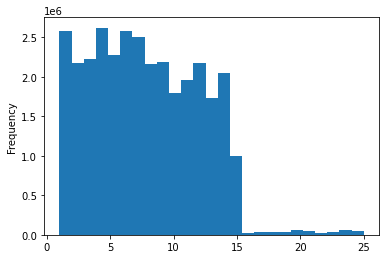

In [35]:
#brave new scatterplot
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

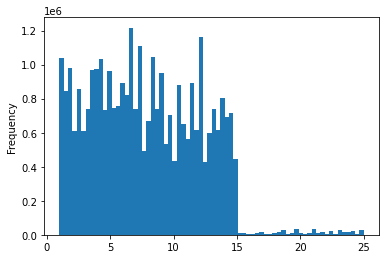

In [36]:
#ok let's expand the bin 
ords_prods_merge['prices'].plot.hist(bins = 70)

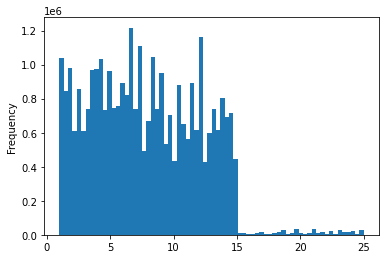

In [37]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [38]:
#saving our histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png'))

__Line Chart__

In [39]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [40]:
dev

array([False,  True, False, ...,  True, False,  True])

In [42]:
np.random.rand(10)

array([0.54149571, 0.53109233, 0.3016315 , 0.91662146, 0.90125835,
       0.66776966, 0.2148013 , 0.31056132, 0.19891516, 0.12871855])

In [43]:
#create a list holding True/Flase values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [44]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [45]:
#Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [46]:
len(ords_prods_merge)

32641268

In [47]:
len(big) + len(small)

32641268

In [49]:
df_2 = small[['order_dow','prices']]

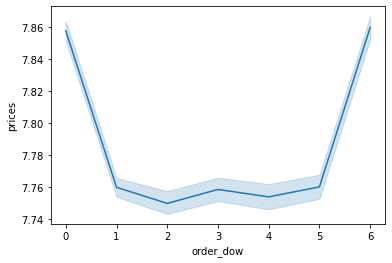

In [50]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [51]:
df_4= ords_prods_merge[['order_dow','prices']]

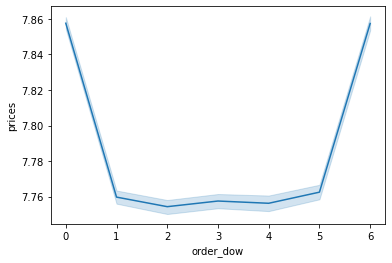

In [52]:
line2 = sns.lineplot(data = df_4, x='order_dow',y='prices')